# MODELING WITH ANTIMONY

This notebook provides a brief introduction to modeling chemical systems using a Jupyter/Colab notebook, python, and the Antimony Programming Language.
[W3schools](https://www.w3schools.com/python/) has a great python tutorial.
More details on Antimony can be found [here](https://tellurium.readthedocs.io/en/latest/antimony.html).

# The Colab Environment
* Setup
* Code and text cells
* Namespace persistence
* Formulas in text cells

# Python in Brief

## Elemental data types

In [5]:
1 + (1 == 2)

1

* str, float, int
* list (properties, slices), deep copy
* dict: reference, assign
* range function

## Pandas DataFrames

Pandas is a python library that is available to you by using an ``import`` statement.
Pandas provides a "table abstraction" that is often a convenient data structure for analysis.

### Creating

In [10]:
import pandas as pd

In [17]:
df = pd.DataFrame(arr)
df

,0
0,1
1,2
2,3
3,4


In [21]:
# Add tables
df + df

,time,result,rate
w,2,20,20.0
x,4,40,20.0
y,6,60,20.0
z,8,80,20.0


In [25]:
df2 = df.sort_values('result', ascending=False)
df2

,time,result,rate
z,4,40,10.0
y,3,30,10.0
x,2,20,10.0
w,1,10,10.0


### Row & Column Names

In [28]:
# Column
df['result']

,result
w,10
x,20
y,30
z,40


In [29]:
# Select a row
df.loc['w', :]

,w
time,1.0
result,10.0
rate,10.0


### Reading and Writing CSV Files

### Plotting

## Flow of control

* ``if``, ``elif``, ``else``
* ``for``
* ``def`` (functions) and requirements for writing functions

In [32]:
# for loop
alist = [1, 2, 3]
for i in arr:
    print(i)

1
2
3
4


In [35]:
# Conditionals
for i in arr:
    if i < 3:
        print('*', i)
    else:
        print('**', i)


* 1
* 2
** 3
** 4


In [46]:
# Functions
def foo(arg: int)->list:
    # Adds 1 to arg
    result = list(range(arg))
    return result

# Test
rslt = foo(3)
assert(rslt[0] == 0)
print("OK!")

OK!


In [43]:
rslt[1] == 0

False

# Antimony and Tellurium Basics

* Simple model
* Load, simulate, plot
* Changes values of parameters
* Using simulation data directly
* Event statements
* Assignment statements

Antimony is a language for modeling chemical systems that allows the modeller to describe how species are transformed into other species by reactions.

A reaction has:
* a left hand side that specifies reactants
* a right hand side that specifies products
* a rate law that is a mathematical expression of the rate (flux) of the reaction

For example:

    J1: A + B -> C + D; k*A*B
    
    k = 2

``J1`` is the name of a reaction that transforms species ``A`` and ``B`` into ``C`` and ``D`` at a rate that is k times the current concentration of ``A`` and ``B``.

## Sequential Pathway

We are given a sequential pathway that is fed by the boundary species $S_1$.

$S_1 \xrightarrow{k_1 S_1} S_2 \xrightarrow{k_2 S_2} S_3 \xrightarrow{k_3 S_3} \emptyset,~~ k_1 = 1, k_2 =2, k_3=0.5$

We will use the ``tellurium`` library to interpret and execute Antimony.

In [2]:
try:
    import tellurium as te
except:
    !pip install -q tellurium  # Install tellurium if it's not present
    import tellurium as te

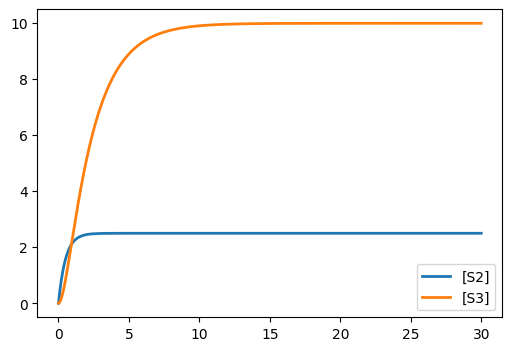

In [4]:
MODEL = f"""
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> ; k3*S3
k1 = 1
k2 = 2
k3 = 0.5
$S1 = 5
"""
rr = te.loada(MODEL)
rr.simulate(0, 30, 300) # Simulate the interval [0, 30] with 300 points
rr.plot()

By default ``S1`` is not displayed since it is a constant (boundary species), as indicated by the ``$``.
Also, we can get access to the data produced by the simulation, as indicated below.
These data are a ``numpy`` array but can be converted to a ``DataFrame``.

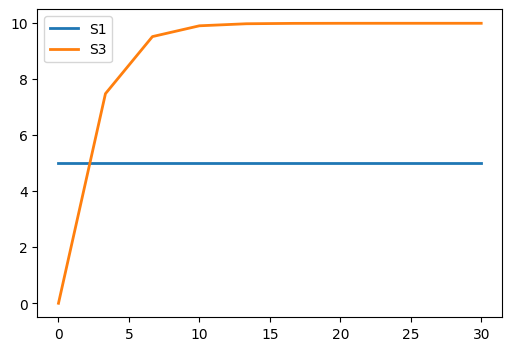

In [7]:
MODEL = f"""
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> ; k3*S3
k1 = 1
k2 = 2
k3 = 0.5
$S1 = 5
"""
rr = te.loada(MODEL)
selections = ["time", "S1", "S3"]
data = rr.simulate(0, 30, 10, selections=selections) 
rr.plot()

In [8]:
# (named) Array
data

       time, S1,      S3
 [[       0,  5,       0],
  [ 3.33333,  5,  7.4859],
  [ 6.66667,  5, 9.52434],
  [      10,  5, 9.91015],
  [ 13.3333,  5, 9.98302],
  [ 16.6667,  5, 9.99679],
  [      20,  5, 9.99939],
  [ 23.3333,  5, 9.99987],
  [ 26.6667,  5, 9.99996],
  [      30,  5, 9.99999]]

In [11]:
# Conversion to a DataFrame
data_df = pd.DataFrame(data, columns=data.colnames)
data_df

,time,S1,S3
0,0.000000,5.0,0.000000
1,3.333333,5.0,7.485903
2,6.666667,5.0,9.524338
3,10.000000,5.0,9.910152
4,13.333333,5.0,9.983019
5,16.666667,5.0,9.996790
6,20.000000,5.0,9.999388
7,23.333333,5.0,9.999874
8,26.666667,5.0,9.999962
9,30.000000,5.0,9.999994


## Assignment rules

Assignment rules allow us to manipulate data during simulation. This is particularly useful for implementing controllers. It also provides a way to introduce distrubanes. Assignment rules can specify the value of a variable at each time instant using the ``:=`` operator in contrast to a single value change at simulation initialization via the ``=`` operator.

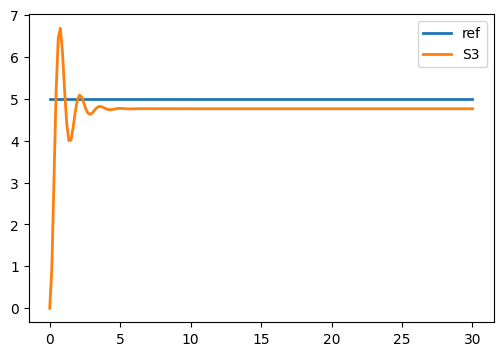

In [17]:
PCONTROL_MODEL = f"""
const S1;

S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> ; k3*S3
k1 = 1
k2 = 2
k3 = 0.5
ref = 5
delta = 0
$S1 = 5

// Proportional controller
kP = 10;
control_error := ref - S3
S1 := kP*control_error
"""
rr = te.loada(PCONTROL_MODEL)
selections = ["time", "ref", "S3"]
rr.simulate(0, 30, 200, selections=selections)
rr.plot()

## Events

Events allow us to change the values of variables in the simulation when a condition is met. Typically, we'll use time triggered events.

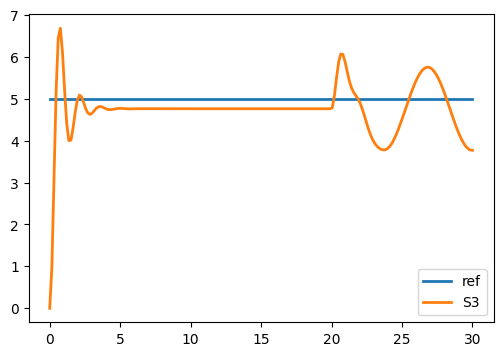

In [18]:
PCONTROL_MODEL = f"""
const S1;

S1 -> S2; k1*(S1 + delta*sin(time))
S2 -> S3; k2*S2
S3 -> ; k3*S3
k1 = 1
k2 = 2
k3 = 0.5
ref = 5
delta = 0
$S1 = 5
at time>20: delta = 10

// Proportional controller
kP = 10;
control_error := ref - S3
S1 := kP*control_error
"""
rr = te.loada(PCONTROL_MODEL)
selections = ["time", "ref", "S3"]
rr.simulate(0, 30, 200, selections=selections)
rr.plot()

# BioModels

[BioModels](https://www.ebi.ac.uk/biomodels/search?query=*%3A*+AND+curationstatus%3A%22Manually+curated%22&domain=biomodels) is repository of existing models that you'll want to use for your Part 1 course project. The repository has about 1,000 curated models, descriptions of the model, and a link to a published paper.

## Running a model in BioModels

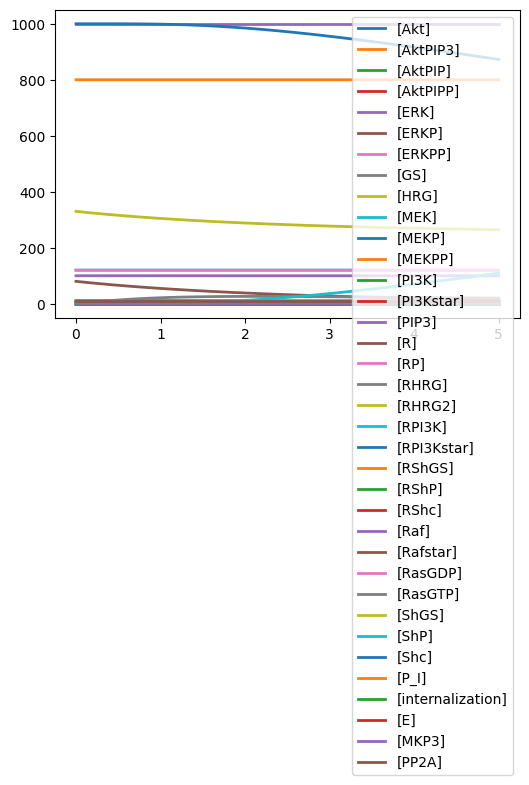

In [19]:
# Get the link to the model from the "Files" tab
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL8256371999/3/BIOMD0000000146_url.xml"
# Load the model using a special tellurium method
rr = te.loadSBMLModel(URL)
# Run and plot as usual
rr.simulate()
rr.plot()

# Examining the model

In [20]:
print(rr.getAntimony())

// Created by libAntimony v2.15.0
model *model_0000001()

  // Compartments and Species:
  compartment compartment_0000001;
  species Akt in compartment_0000001, AktPIP3 in compartment_0000001, AktPIP in compartment_0000001;
  species AktPIPP in compartment_0000001, ERK in compartment_0000001, ERKP in compartment_0000001;
  species ERKPP in compartment_0000001, GS in compartment_0000001, HRG in compartment_0000001;
  species MEK in compartment_0000001, MEKP in compartment_0000001, MEKPP in compartment_0000001;
  species PI3K in compartment_0000001, PI3Kstar in compartment_0000001, PIP3 in compartment_0000001;
  species R in compartment_0000001, RP in compartment_0000001, RHRG in compartment_0000001;
  species RHRG2 in compartment_0000001, RPI3K in compartment_0000001, RPI3Kstar in compartment_0000001;
  species RShGS in compartment_0000001, RShP in compartment_0000001, RShc in compartment_0000001;
  species Raf in compartment_0000001, Rafstar in compartment_0000001, RasGDP in compartme

## Webiridum

[Webiridium](https://sys-bio.github.io/WebIridium/) is a standalone browser tool that you can use to view and execute models, including BioModels.